In [2]:
from funcs.HelperFuncs import *
from funcs.CSIFuncs import *
from funcs.WLANFuncs import *

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Setting configs


In [4]:
# Directory storing the CSI and WLAN captures
resources_dir = "/Volumes/tim_details/tim_honours/CAPTURES"

# Directory to save plots to
plt_dir = "/Users/timothylee/Desktop/Uni/Yr5/Honours/honours_thesis/figures/plt_figs/"

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Supress pd scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Resolution of plots
plt.rcParams["figure.dpi"] = 100 # 300

# Backend to generate plots
# mpl.use("agg")
# %matplotlib ipympl
%matplotlib inline

# plt figure style
fig_style = "seaborn-v0_8-whitegrid"

# colormaps
cmap_seq = "viridis"
cmap_cycl = "twilight"
cmap_qual = "Pastel1"


## Using example captures for initial analysis


In [5]:
devices = [
    "client_pc_200",
    "client_pi_200",
]

videos = [
    "v=A3gUpodXMv0",
    "v=gxxqdrrpgZc",
    "v=mkWKZWMokdI",
    "v=NSW5u1RTxEA",
]

instances = [
    "cap_1",
    "cap_10",
    "cap_50",
    "cap_70",
    "cap_80",
]

i = 1
j = 2
k = 2

## Comparing WLAN data across captures

We want low intra-class distance and high inter-class distance.


## Combining and Comparing WLAN and CSI data for each capture

Observations are:

- There are MANY more WLAN packets than CSI packets for each capture
- The relative bursts are the same for the WLAN and CSI captures. This is easiest visualised, where "horizontally stretching" the CSI plot of cumulative number of frames through time would fit the corresponding WLAN plot for the cumulative number of frames through time.


In [6]:
# READING DATAFRAMES

# Getting filepaths
wlan_fp = os.path.join(
    resources_dir, devices[i], videos[j], "wlan_h5", f"{instances[k]}.h5"
)
csi_fp = os.path.join(
    resources_dir, devices[i], videos[j], "csi_h5", f"{instances[k]}.h5"
)
# Reading dataframes
wlan_df = pd.read_hdf(wlan_fp, key=H5_WLAN_KEY, mode="r")
csi_df = pd.read_hdf(csi_fp, key=H5_CSI_KEY, mode="r")

# Displaying dataframes
display(wlan_df)
display(csi_df)

,frame.time_epoch,frame.time_relative,frame.len,wlan_radio.signal_dbm,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.frag,wlan.seq,wlan.da,wlan.sa,ip.proto,ip.src,ip.dst,ip.len,srcport,dstport,is_upstream
frame.number,,,,,,,,,,,,,,,,,,
1,1693942751.124928,0.000000,45,-51,0,0,10,0,227,74:83:c2:c1:6d:15,d8:3a:dd:21:b8:2b,0,0,0,0,0,0,True
2,1693942751.125645,0.000717,45,-50,0,0,10,0,227,74:83:c2:c1:6d:15,d8:3a:dd:21:b8:2b,0,0,0,0,0,0,True
3,1693942751.126071,0.001143,45,-55,0,2,12,0,228,74:83:c2:c1:6d:15,d8:3a:dd:21:b8:2b,0,0,0,0,0,0,True
4,1693942752.381347,1.256419,257,-48,0,0,4,0,259,ff:ff:ff:ff:ff:ff,d8:3a:dd:21:b8:2b,0,0,0,0,0,0,True
5,1693942752.383591,1.258663,268,-54,0,0,5,0,2742,d8:3a:dd:21:b8:2b,34:12:98:07:df:82,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52987,1693942978.422077,227.297149,134,-54,0,2,8,0,3916,34:12:98:02:02:14,d8:3a:dd:21:b8:2b,6,10.0.1.29,142.250.204.2,52,0,0,True
52988,1693942978.426878,227.301950,124,-58,0,2,8,0,1286,d8:3a:dd:21:b8:2b,34:12:98:02:02:14,6,34.104.35.123,10.0.1.29,52,0,0,False
52989,1693942978.428059,227.303131,134,-54,0,2,8,0,3917,34:12:98:02:02:14,d8:3a:dd:21:b8:2b,6,10.0.1.29,34.104.35.123,52,0,0,True


,frame.time_epoch,frame.time_relative,fctl,seqn,fragn,csi_0_r,csi_0_i,csi_1_r,csi_1_i,csi_2_r,...,csi_59_r,csi_59_i,csi_60_r,csi_60_i,csi_61_r,csi_61_i,csi_62_r,csi_62_i,csi_63_r,csi_63_i
frame.number,,,,,,,,,,,,,,,,,,,,,
1,1693942757.372217,0.000000,88,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1693942757.380696,0.008479,88,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1693942757.420732,0.048515,88,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1693942757.471034,0.098817,88,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1693942757.513267,0.141050,88,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10426,1693942978.002988,220.630771,88,3908,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10427,1693942978.048128,220.675911,94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10428,1693942978.048238,220.676021,88,3909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


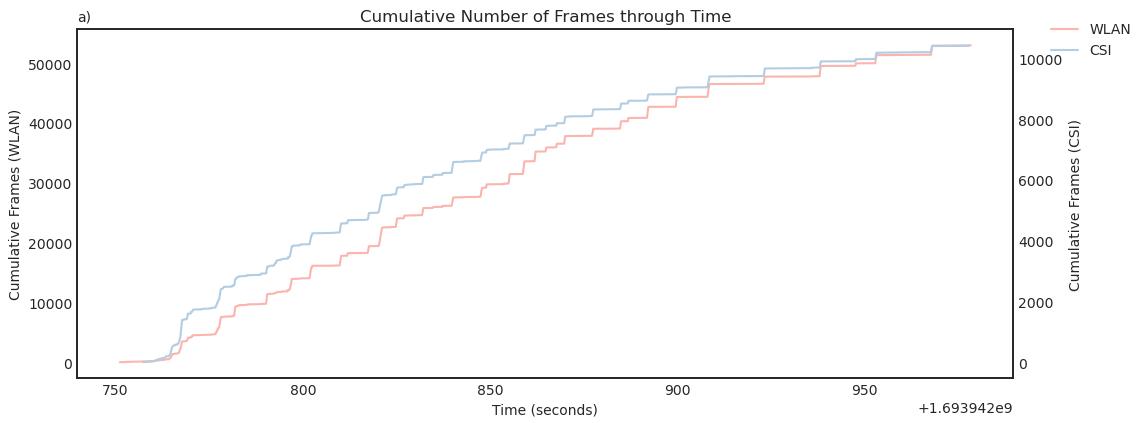

In [12]:
# COMPARING THE CUMULATIVE NUMBER OF FRAMES THROUGH TIME OF A CAPTURE'S CSI AND WLAN

# TODO: NEED TO TRY WITH frame.time_epoch - THIS WILL BE ALIGNED

# PLOTTING WLAN AND CSI ON SAME AXES WITH DIFFERENT SCALES
# with plt.style.context(fig_style):
with plt.style.context("seaborn-v0_8-white"):
    # Making figure
    fig, ax1 = plt.subplots(figsize=(10, 4))
    fig.tight_layout()

    # PLOTTING WLAN
    ax1.plot(
        wlan_df["frame.time_epoch"],
        wlan_df.index,
        label="WLAN",
        color=cmap_qual(0),
    )
    ax1.set_ylabel("Cumulative Frames (WLAN)")

    # PLOTTING WLAN
    # Create a second set of y-axes for the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(
        csi_df["frame.time_epoch"],
        csi_df.index,
        label="CSI",
        color=cmap_qual(1),
    )
    ax2.set_ylabel("Cumulative Frames (CSI)")
    # Set legend position (or remove)

    # CUSTOMISING APPEARANCE
    # Set axis titles
    ax1.set_title("a)", loc="left", fontsize="medium")
    ax1.set_title("Cumulative Number of Frames through Time")
    ax1.set_xlabel("Time (seconds)")
    # Set legend position (or remove)
    fig.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # ax1.legend(loc="upper left")

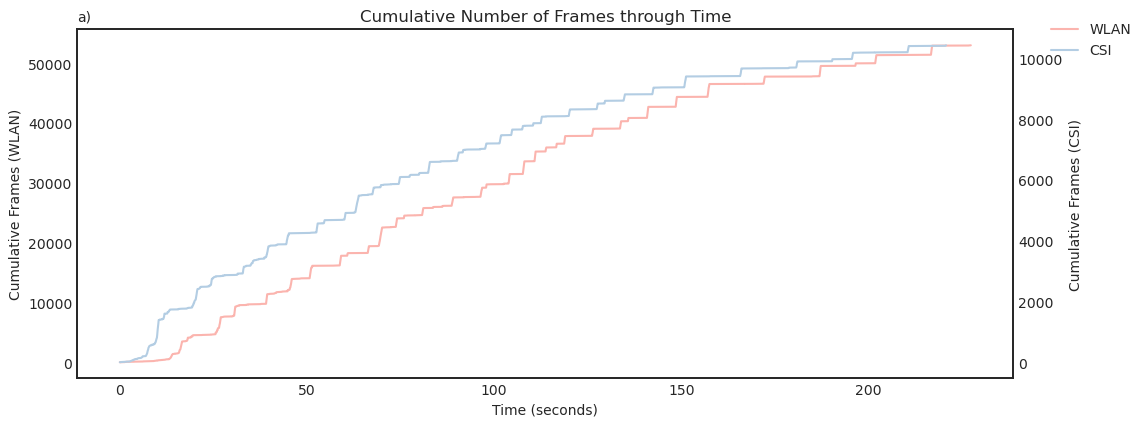

In [13]:
# COMPARING THE CUMULATIVE NUMBER OF FRAMES THROUGH TIME OF A CAPTURE'S CSI AND WLAN

# TODO: NEED TO TRY WITH frame.time_epoch - THIS WILL BE ALIGNED

# PLOTTING WLAN AND CSI ON SAME AXES WITH DIFFERENT SCALES
# with plt.style.context(fig_style):
with plt.style.context("seaborn-v0_8-white"):
    # Making figure
    fig, ax1 = plt.subplots(figsize=(10, 4))
    fig.tight_layout()

    # PLOTTING WLAN
    ax1.plot(
        wlan_df["frame.time_relative"],
        wlan_df.index,
        label="WLAN",
        color=cmap_qual(0),
    )
    ax1.set_ylabel("Cumulative Frames (WLAN)")

    # PLOTTING WLAN
    # Create a second set of y-axes for the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(
        csi_df["frame.time_relative"],
        csi_df.index,
        label="CSI",
        color=cmap_qual(1),
    )
    ax2.set_ylabel("Cumulative Frames (CSI)")
    # Set legend position (or remove)

    # CUSTOMISING APPEARANCE
    # Set axis titles
    ax1.set_title("a)", loc="left", fontsize="medium")
    ax1.set_title("Cumulative Number of Frames through Time")
    ax1.set_xlabel("Time (seconds)")
    # Set legend position (or remove)
    fig.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # ax1.legend(loc="upper left")